# Sensitivity Analysis

This notebook performs sesitivity analysis to identify the uncertainities influencing the outcomes of interest. These uncertainities than will be used for formulating scenarios for policy (levers) samping in next step.

In previous analysis, an open exploration was performed to understand the prospect damage if no steps towards flood protectins are taken. The analysis marked dike failure as the biggest threat and Zutphen as the most vulnerable region.
 

Gelderland province priritize the safety of its residents. Thus, the focus of this analysis was set to identify the uncertainities influencing the casualties in the region.

In [1]:
from __future__ import (unicode_literals, print_function, absolute_import, division)
from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario,SequentialEvaluator)
from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)
import time
from problem_formulation import get_model_for_problem_formulation
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
from ema_workbench.em_framework.evaluators import LHS, SOBOL, MORRIS
from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis.scenario_discovery_util import RuleInductionType
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from SALib.analyze import sobol
import copy
from ema_workbench import save_results
from ema_workbench import load_results


## Uncertainties Sampling

The scope of this analysis is broader by design and results from other two provinces are also taken into the account. Gelderland is an upstream province and every policy intervention upstream affects the downstream provinces. Thus, results from a holistic sensitivity analysis will result in key uncertainities influencing the entire stream.

Selected probelm formulation ---> 3

In [12]:
dike_model, planning_steps = get_model_for_problem_formulation(3)

In [3]:
# Visulaize model uncertainties laong with its lower boundary, upper boundary,and types (RealParameter/IntegerParameter/CategoricalParameter)
for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = dike_model.uncertainties

uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132)
RealParameter('A.1_Bmax', 30, 350)
RealParameter('A.1_pfail', 0, 1)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350)
RealParameter('A.2_pfail', 0, 1)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350)
RealParameter('A.3_pfail', 0, 1)
CategoricalParameter('A.3_Brate', [0, 1, 2])
RealParameter('A.4_Bmax', 30, 350)
RealParameter('A.4_pfail', 0, 1)
CategoricalParameter('A.4_Brate', [0, 1, 2])
RealParameter('A.5_Bmax', 30, 350)
RealParameter('A.5_pfail', 0, 1)
CategoricalParameter('A.5_Brate', [0, 1, 2])


As shown above, the model has `19 Uncertainties`.
___

Sobol Analysis is selected for Sensitivity Analysis because


1. dike_model is a non-linear model and Sobol Analysis is compatible with non-liner models.
1. Sobol is highly accurate and a gold standard for global Sensitivity analysis.
1. The number of experimets are well within the range of Sobol Analysis (i.e >1000(k+2) = 21000).

___

Sobol analysis requires N(2k+2) samples, where N is a baseline number of experiments required to cover the uncertainties (let's also assume 1000 in this case) and k is the number of uncertainties. We have `k = 19 uncertainties`, so we'll have `1000 * (19*2 + 2) = 40,000` experiments in total.

In [4]:
# Set problem for salib by passing all the model uncertainities
problem = get_SALib_problem(uncertainties)
print(problem)

{'num_vars': 19, 'names': ['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail', 'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate', 'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax', 'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1', 'discount rate 2'], 'bounds': [(0, 133), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (0, 4), (0, 4), (0, 4)]}


`CAUTION`
> 'UNCOMMENT FOLLOWING CODE WHEN RUNNING FOR THE FIRST TIME - 40K SCENARIOS TOOK ME 10+ HOURS TO RUN'

In [23]:
# n_exp = 1000
# with MultiprocessingEvaluator(dike_model) as evaluator:
#     experiments_sobol, outcomes_sobol = evaluator.perform_experiments(scenarios=1000,uncertainty_sampling=SOBOL,policies=1
#                             )

[MainProcess/INFO] pool started
C:\Users\lekha\Anaconda3\envs\gds\lib\site-packages\SALib\sample\saltelli.py:52: FutureWarning: 
        Convergence properties of the Sobol' sequence is only valid if `N` = 2^n.
        SALib will continue on, but results may have issues.
        In future, this will raise an error.
        
  warnings.warn(msg, FutureWarning)
[MainProcess/INFO] performing 40000 scenarios * 1 policies * 1 model(s) = 40000 experiments
[MainProcess/INFO] 4000 cases completed
[MainProcess/INFO] 8000 cases completed
[MainProcess/INFO] 12000 cases completed
[MainProcess/INFO] 16000 cases completed
[MainProcess/INFO] 20000 cases completed
[MainProcess/INFO] 24000 cases completed
[MainProcess/INFO] 28000 cases completed
[MainProcess/INFO] 32000 cases completed
[MainProcess/INFO] 36000 cases completed
[MainProcess/INFO] 40000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [57]:
# experiments_sobol

In [58]:
# pd.DataFrame.from_dict(outcomes_sobol)

Loading experiments results from above run 

In [26]:
save_results((experiments_sobol, outcomes_sobol), 'sobol_uncertainties_sampling.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\lekha\Desktop\ReferenceMDM\epa1361_open\final assignment\sobol_uncertainties_sampling.tar.gz


In [27]:
experiments_loaded, outcomes_loaded = load_results('sobol_uncertainties_sampling.tar.gz')

[MainProcess/INFO] results loaded succesfully from C:\Users\lekha\Desktop\ReferenceMDM\epa1361_open\final assignment\sobol_uncertainties_sampling.tar.gz


In [28]:
experiments_loaded

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,0.0,150.46875,1.5,0.486816,208.28125,10.0,0.241699,217.96875,10.0,0.671387,...,9.0,5.0,9.0,8.0,1.0,0.0,1.0,210,2,dikesnet
1,46.0,150.46875,1.5,0.486816,208.28125,10.0,0.241699,217.96875,10.0,0.671387,...,9.0,5.0,9.0,8.0,1.0,0.0,1.0,211,2,dikesnet
2,0.0,197.96875,1.5,0.486816,208.28125,10.0,0.241699,217.96875,10.0,0.671387,...,9.0,5.0,9.0,8.0,1.0,0.0,1.0,212,2,dikesnet
3,0.0,150.46875,1.0,0.486816,208.28125,10.0,0.241699,217.96875,10.0,0.671387,...,9.0,5.0,9.0,8.0,1.0,0.0,1.0,213,2,dikesnet
4,0.0,150.46875,1.5,0.825684,208.28125,10.0,0.241699,217.96875,10.0,0.671387,...,9.0,5.0,9.0,8.0,1.0,0.0,1.0,214,2,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,42.0,294.53125,1.0,0.687988,303.28125,1.0,0.413574,341.09375,10.0,0.062012,...,9.0,5.0,9.0,8.0,1.0,0.0,1.0,40205,2,dikesnet
39996,42.0,294.53125,1.0,0.687988,303.28125,1.0,0.413574,341.09375,10.0,0.062012,...,9.0,5.0,9.0,8.0,1.0,0.0,1.0,40206,2,dikesnet
39997,42.0,294.53125,1.0,0.687988,303.28125,1.0,0.413574,341.09375,10.0,0.062012,...,9.0,5.0,9.0,8.0,1.0,0.0,1.0,40207,2,dikesnet
39998,42.0,294.53125,1.0,0.687988,303.28125,1.0,0.413574,341.09375,10.0,0.062012,...,9.0,5.0,9.0,8.0,1.0,0.0,1.0,40208,2,dikesnet


In [46]:
pd.DataFrame.from_dict(outcomes_loaded)

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,1.620628e+08,0.0,2.218915e+08,0.001504,9.212886e+07,0.000000,6.216330e+07,0.0,8.122223e+07,0.0,1.305500e+09,113.638340
1,1.620628e+08,0.0,2.218840e+08,0.001497,9.212886e+07,0.000000,6.216330e+07,0.0,8.122223e+07,0.0,1.305500e+09,113.432413
2,1.620628e+08,0.0,2.218915e+08,0.001504,9.212886e+07,0.000000,6.216330e+07,0.0,8.122223e+07,0.0,1.305500e+09,113.638340
3,1.620628e+08,0.0,2.218915e+08,0.001504,9.212886e+07,0.000000,6.216330e+07,0.0,8.122223e+07,0.0,1.305500e+09,113.638340
4,1.620628e+08,0.0,2.218915e+08,0.001504,9.212886e+07,0.000000,6.216330e+07,0.0,8.122223e+07,0.0,1.305500e+09,113.638340
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,1.620628e+08,0.0,2.196107e+08,0.000331,2.440137e+08,0.126483,6.216330e+07,0.0,8.122223e+07,0.0,1.305500e+09,5206.967584
39996,1.620628e+08,0.0,2.197492e+08,0.000331,2.718614e+08,0.126483,6.216330e+07,0.0,8.122223e+07,0.0,1.305500e+09,5206.967584
39997,1.620628e+08,0.0,2.196107e+08,0.000331,2.389011e+08,0.126483,6.216330e+07,0.0,8.122223e+07,0.0,1.305500e+09,5206.967584
39998,1.620628e+08,0.0,2.196107e+08,0.000331,2.440137e+08,0.126483,6.216330e+07,0.0,8.122223e+07,0.0,1.305500e+09,5206.967584


In [54]:
for y in pd.DataFrame.from_dict(outcomes_loaded).columns.to_list():
    print(y)

A.1 Total Costs
A.1_Expected Number of Deaths
A.2 Total Costs
A.2_Expected Number of Deaths
A.3 Total Costs
A.3_Expected Number of Deaths
A.4 Total Costs
A.4_Expected Number of Deaths
A.5 Total Costs
A.5_Expected Number of Deaths
RfR Total Costs
Expected Evacuation Costs


### By default, the Sobol sampler calculates second-order interaction effects between each pair of variables.

The SALib analysis returns a dictionary with keys for the different relevant indicators (e.g. S1 and ST for first-order and total effects). The values are in the same order as the names of the problem dictionary, and indicate the fraction of total output variance corresponding to each of the indices.

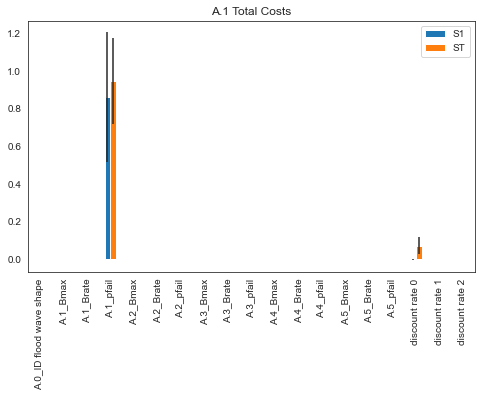

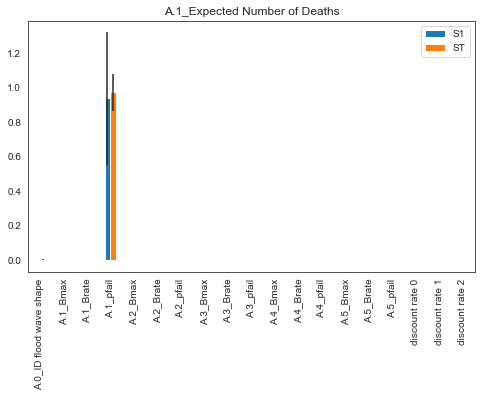

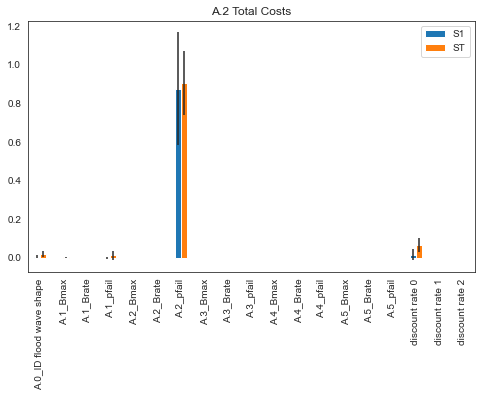

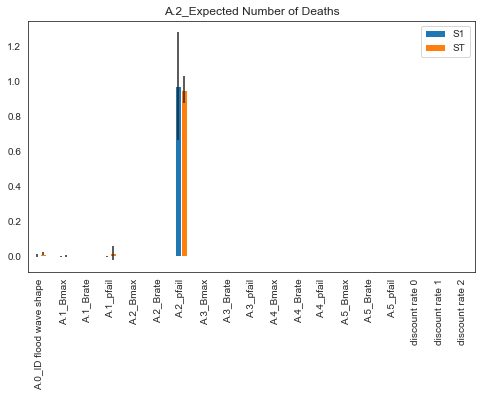

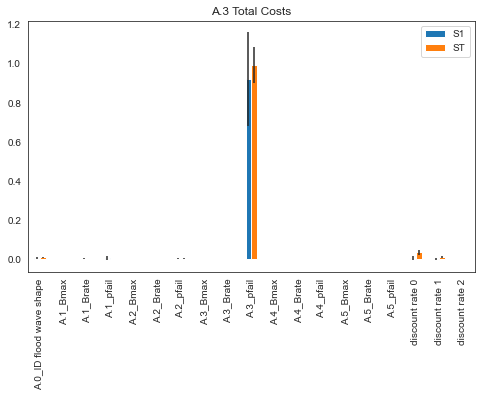

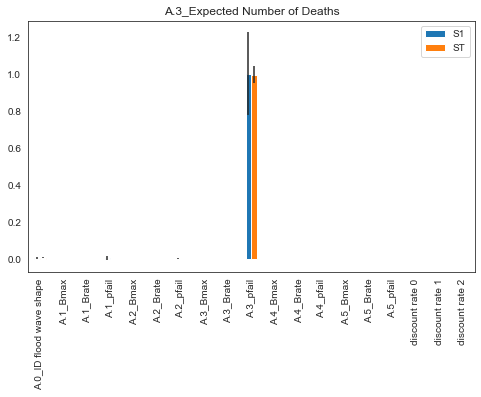

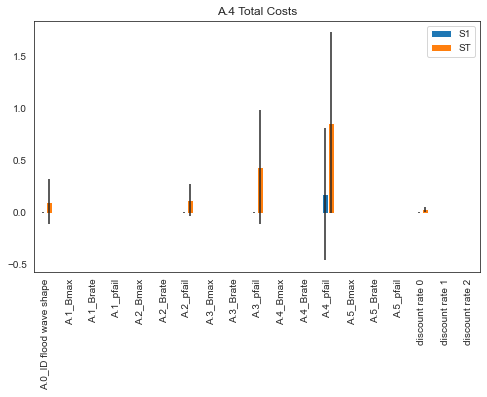

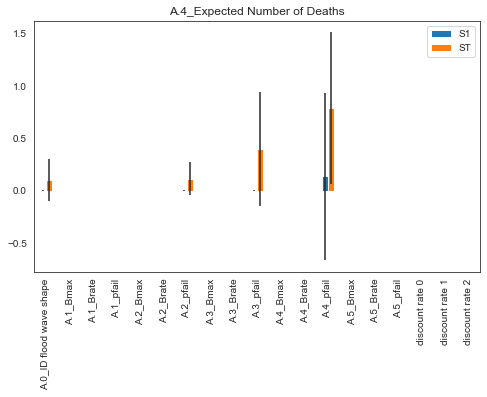

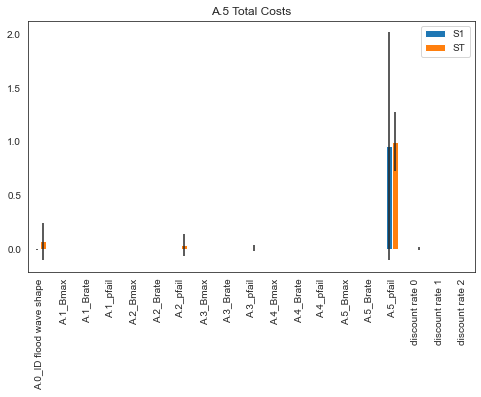

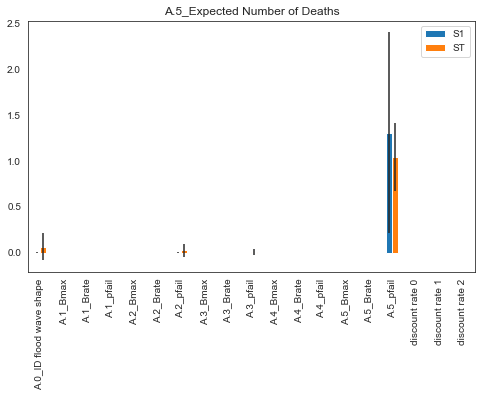

C:\Users\lekha\Anaconda3\envs\gds\lib\site-packages\SALib\analyze\sobol.py:87: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y - Y.mean()) / Y.std()
C:\Users\lekha\Anaconda3\envs\gds\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


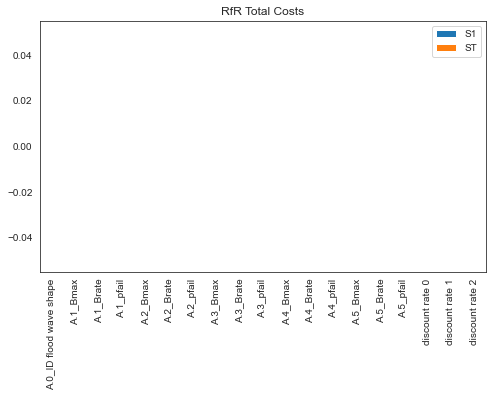

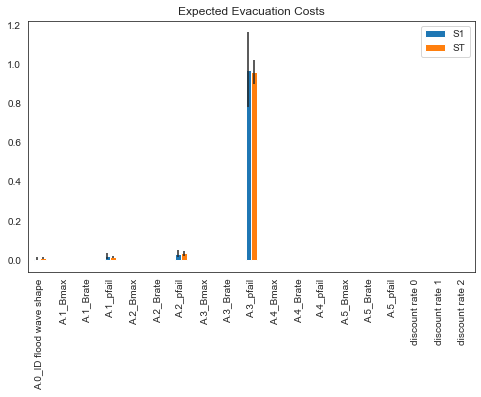

In [56]:
for y in pd.DataFrame.from_dict(outcomes_loaded).columns.to_list(): # iterating the columns of dataframe
    Si = sobol.analyze(problem, outcomes_loaded[y], calc_second_order=True,print_to_console=False) # Getting SAlib index for each column in output dataframe

    # Processing the results for plotting the graph
    scores_filtered = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
    Si_df = pd.DataFrame(scores_filtered, index=problem['names'])

    sns.set_style('white')
    fig, ax = plt.subplots(1)

    indices = Si_df[['S1','ST']]
    err = Si_df[['S1_conf','ST_conf']]

    indices.plot.bar(yerr=err.values.T,ax=ax)
    fig.set_size_inches(8,6)
    ax.set_title(str(y))
    fig.subplots_adjust(bottom=0.3)
    plt.show()

### Interesting Takeaways - 
1. Total costs and total deaths for each area is influenced majorly by the probability of dike failing in that respective area i.e. A1 Total Costs and Expected number of deaths is influenced by A1_Pfail.
2. Except for interestingly, Area 4 - Cortonoever, which is also influenced by dikes failining in A2 and A3, which makes sense as its a downstream town.

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because on

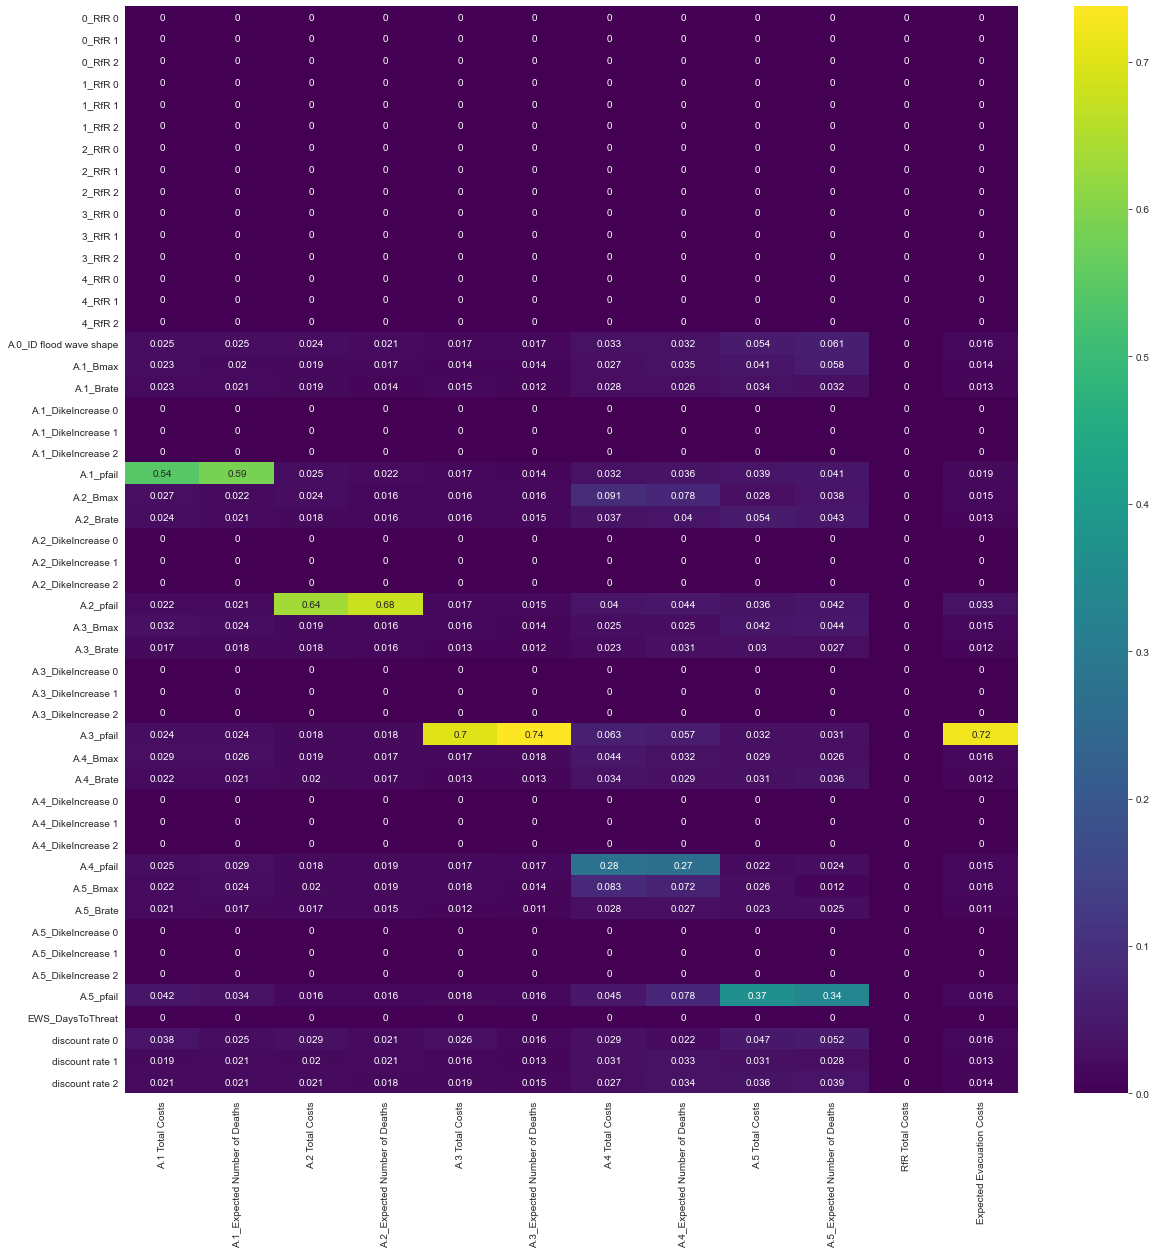

In [65]:
from ema_workbench.analysis import feature_scoring

x = experiments_loaded
y = outcomes_loaded

fig, ax = plt.subplots(figsize=(20,20))
fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap='viridis', annot=True, ax=ax)
plt.show()

### Expected evacuation costs are highly influenced by the probability of A3 Zutphen Dike failing. 

While identifying the uncertainties affecting the outcomes we have aggregated the costs and prioritized the safety by focusing the analysis on number of deaths in each area. 

## Analysis for identiying policy levers

In [14]:
# Copy levers from the model defination
print(f'Number of policy levers = {len(dike_model.levers)}')
levers = dike_model.levers
levers = copy.deepcopy(dike_model.levers)

print(f'Number of runs required = N(2K+2) = {1000*(2*31+2)}')

# Set problem for salib by passing all the model levers
problem = get_SALib_problem(levers)

Number of policy levers = 31
Number of runs required = N(2K+2) = 64000


`CAUTION`
> 'UNCOMMENT FOLLOWING CODE WHEN RUNNING FOR THE FIRST TIME - 64K SCENARIOS TOOK ME 48+ HOURS TO RUN'

In [4]:
# with MultiprocessingEvaluator(dike_model) as evaluator:
#     experiments_sobol, outcomes_sobol = evaluator.perform_experiments(scenarios=1,uncertainty_sampling=LHS, levers_sampling = SOBOL, policies=1000)

# save_results((experiments_sobol, outcomes_sobol), 'sobol_levers_sampling.tar.gz')

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1 scenarios * 64000 policies * 1 model(s) = 64000 experiments
[MainProcess/INFO] 6400 cases completed
[MainProcess/INFO] 12800 cases completed
[MainProcess/INFO] 19200 cases completed
[MainProcess/INFO] 25600 cases completed
[MainProcess/INFO] 32000 cases completed
[MainProcess/INFO] 38400 cases completed
[MainProcess/INFO] 44800 cases completed
[MainProcess/INFO] 51200 cases completed
[MainProcess/INFO] 57600 cases completed
[MainProcess/INFO] 64000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [7]:
experiments_loaded, outcomes_loaded = load_results('sobol_levers_sampling.tar.gz')

[MainProcess/INFO] results loaded succesfully from /Users/anmolsoni/Documents/Documents – Anmol’s MacBook Air/EPA1361/Assignments/epa_1361/final assignment/sobol_levers_sampling.tar.gz


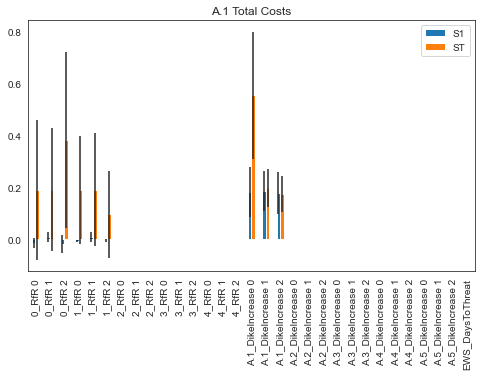

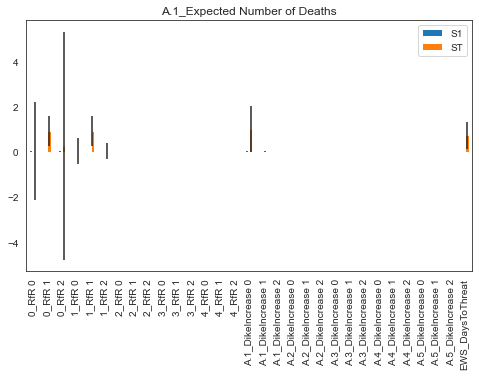

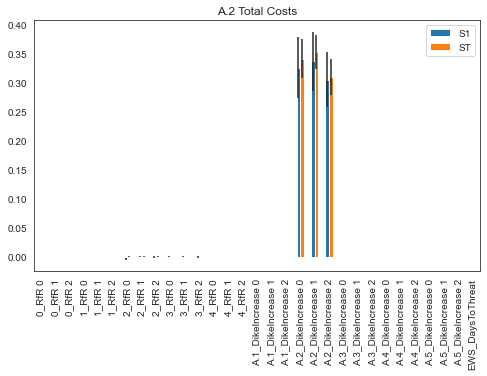

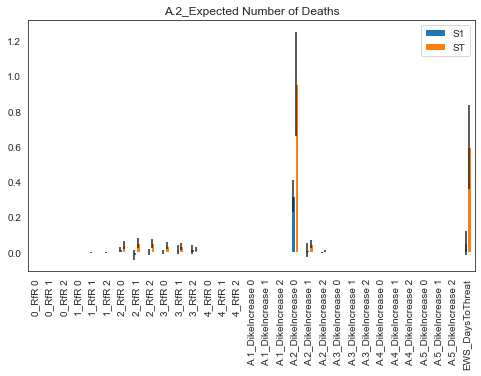

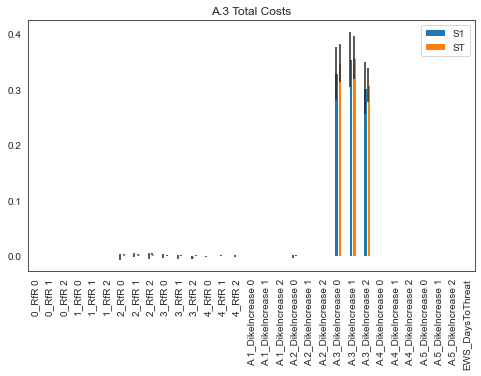

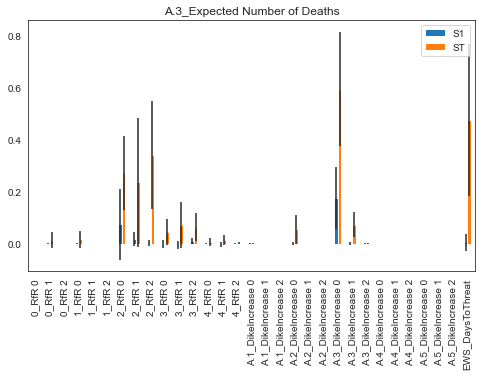

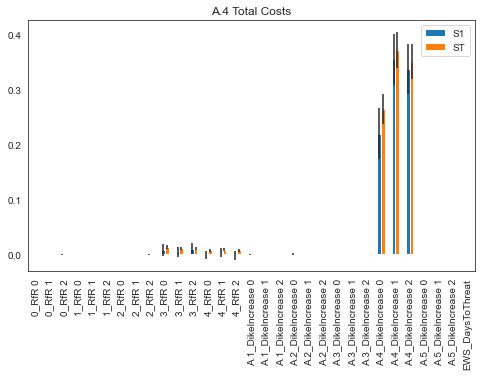

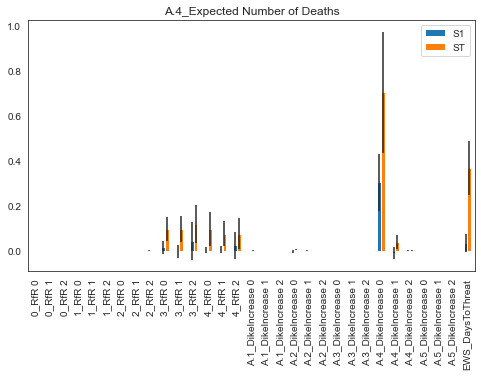

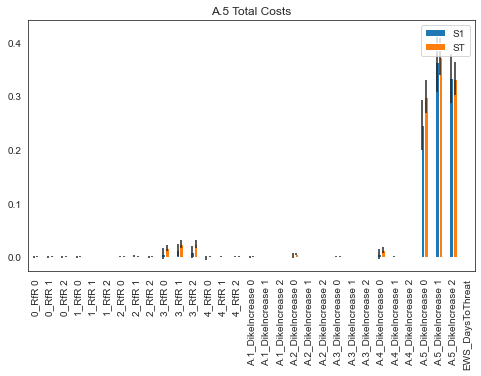

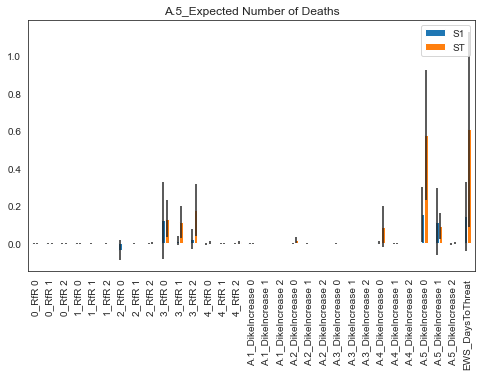

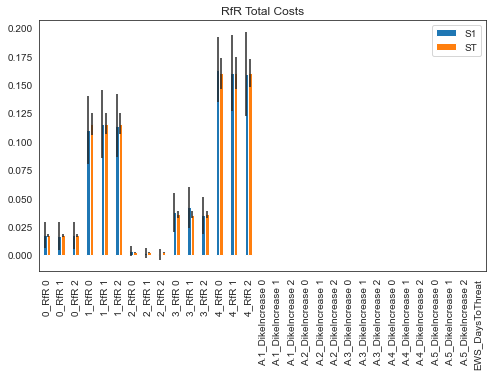

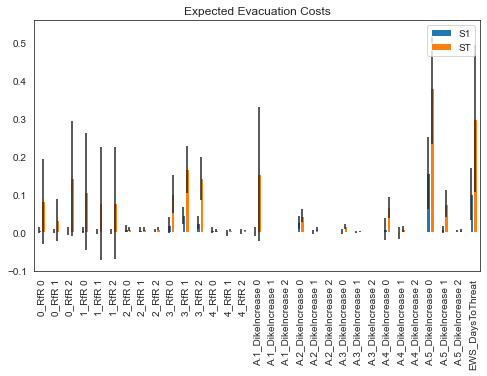

In [10]:
for y in pd.DataFrame.from_dict(outcomes_loaded).columns.to_list(): # iterating the columns of dataframe
    Si = sobol.analyze(problem, outcomes_loaded[y], calc_second_order=True,print_to_console=False) # Getting SAlib index for each column in output dataframe

    # Processing the results for plotting the graph
    scores_filtered = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
    Si_df = pd.DataFrame(scores_filtered, index=problem['names'])

    sns.set_style('white')
    fig, ax = plt.subplots(1)

    indices = Si_df[['S1','ST']]
    err = Si_df[['S1_conf','ST_conf']]

    indices.plot.bar(yerr=err.values.T,ax=ax)
    fig.set_size_inches(8,6)
    ax.set_title(str(y))
    fig.subplots_adjust(bottom=0.3)
    plt.show()

[MainProcess/INFO] A.1_Brate dropped from analysis because only a single category
[MainProcess/INFO] A.2_Brate dropped from analysis because only a single category
[MainProcess/INFO] A.3_Brate dropped from analysis because only a single category
[MainProcess/INFO] A.4_Brate dropped from analysis because only a single category
[MainProcess/INFO] A.5_Brate dropped from analysis because only a single category
[MainProcess/INFO] discount rate 0 dropped from analysis because only a single category
[MainProcess/INFO] discount rate 1 dropped from analysis because only a single category
[MainProcess/INFO] discount rate 2 dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] A.1_Brate dropped from analysis because only a single category
[MainProcess/INFO] A.2_Brate dropped from analysis because only a single category
[MainProcess/INFO] A.3_Brate dropped from analysis because only a single category
[M

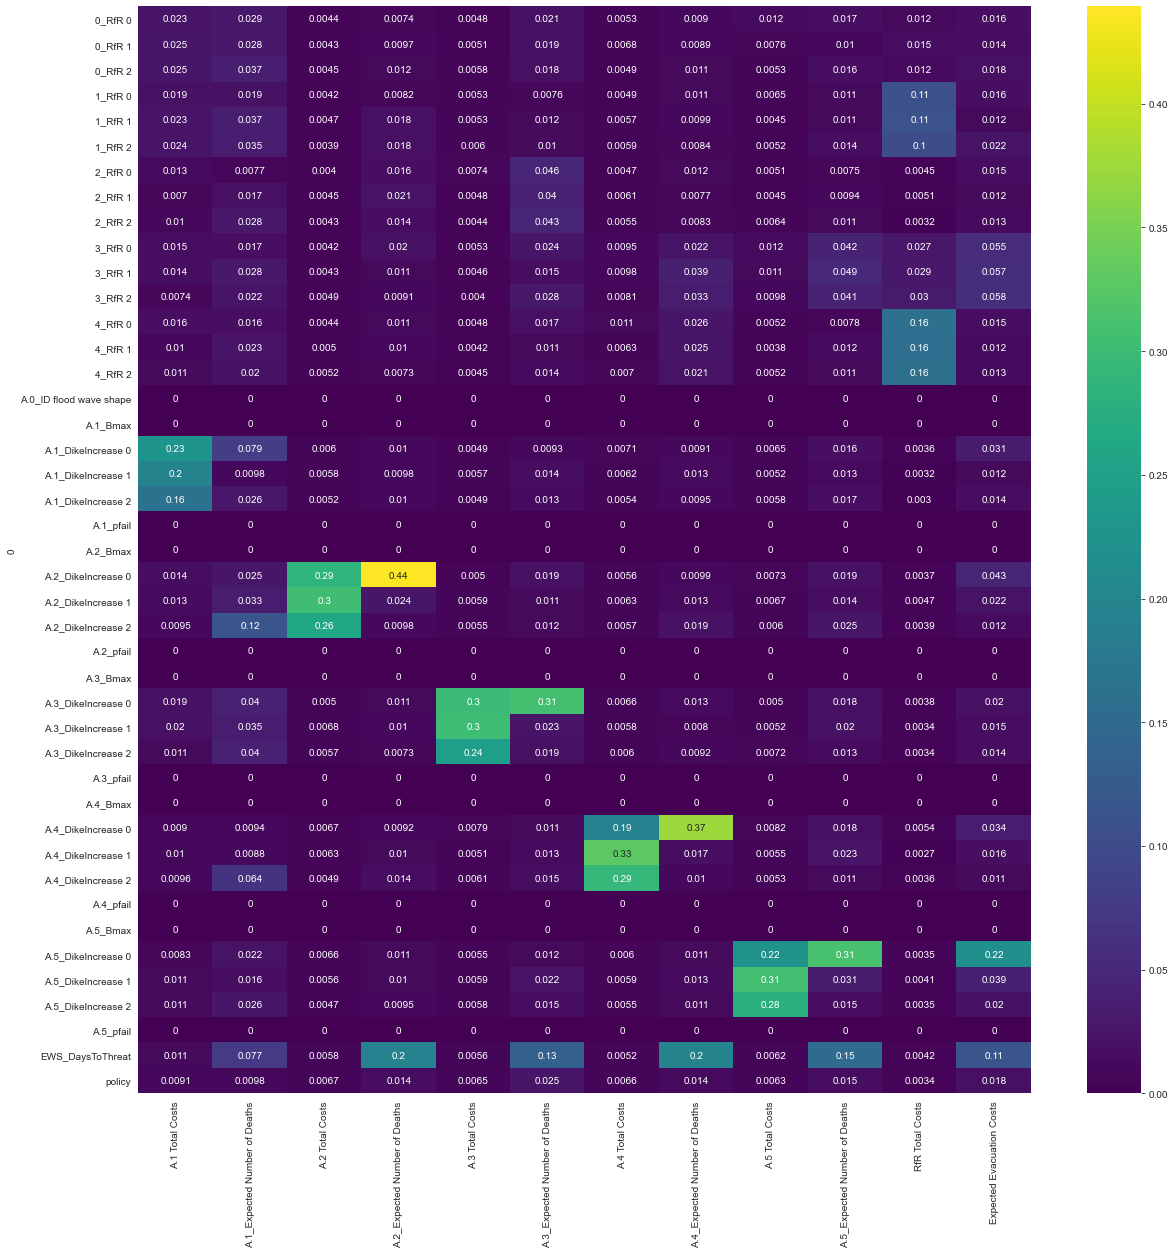

In [11]:
from ema_workbench.analysis import feature_scoring

x = experiments_loaded
y = outcomes_loaded

fig, ax = plt.subplots(figsize=(20,20))
fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap='viridis', annot=True, ax=ax)
plt.show()

Observation: Increasing dike is the most effective lever for reducing death in the province